#  Coverage Graph Generator Software
#### _--> aims to Calculate genome coverage and breadth of coverage and provide graphs._

## Summary
* _[1. Introduction](#chapter-1-introduction)_
* _[2. Set Working Directory](#chapter-2-set-working-directory)_
* _[3. Reads Alignments](#chapter-3-reads-alignment)_
* _[4. Graph Generation](#chapter-4-graph-generation)_
* _[5. Coverage Percentage](#chapter-5-coverage-percentage)_

## 1. Introduction <a class="anchor" id="chapter-1-introduction"></a>


The objective of the project is to estimate the percentage of the coverage of reads for different samples provided as Metagenome-Assembeled Genomes (MAGs), which is a fundamental task in metagenomic analysis. Supplied with Graph generation CGG creates a visual representations that illustrate the extent to which genomic regions have been covered or traversed.

In genomic analysis, coverage graphs play a crucial role in understanding the sequencing depth and coverage across the genome. By visualizing the distribution of sequencing reads or alignments across genomic regions, researchers can evaluate the quality of the data, detect potential gaps or biases, and make informed decisions about downstream analysis such as identifying different influences acting on different samples provided. Moreover, coverage graphs in genomics aid in variant detection, genome assembly validation, and identification of structural variations.

To accomplish our objective we worked with three different sofwares: Bowtie2, SAMtools, and Circos embedded in python.

-**Bowtie2** is a tool for aligning sequencing reads to long reference sequences, in which multiple processors can be used simultaneously to achieve greater alignment speed. Its output is a SAM file which allows to interact with other softwares like SAMtools. 

-**SAMtools** is a library and software for parsing and manipulating alignments in SAM/BAM format. It implements various utilities for post-processing alignments in the SAM format, such as indexing, variant caller and alignment viewer,
and thus provides universal tools for processing read alignments.

-**pyCircos** is a useful tool in python to display variation in genome structure and any other kind of positional relationships between genomic intervals. It uses a circular ideogram layout to facilitate the display of relationships.

In order to understand the following analysis let's remember some useful concepts:

### **Sequence Alignment/Map (SAM) format**

Is a generic alignment format for storing read alignments against reference sequences, supporting short and long reads (up to 128 Mb) produced by different sequencing platforms.

### **Binary Alignment/Map (BAM) format**

Is the compressed binary version of a SAM file and it is used to represent aligned sequences up to 128 Mb.

### **Breadth of coverage**
The fraction of the genome that is covered by the reads obtained from the sequencing. Reads are aligned on the reference to calculate this.

<div>
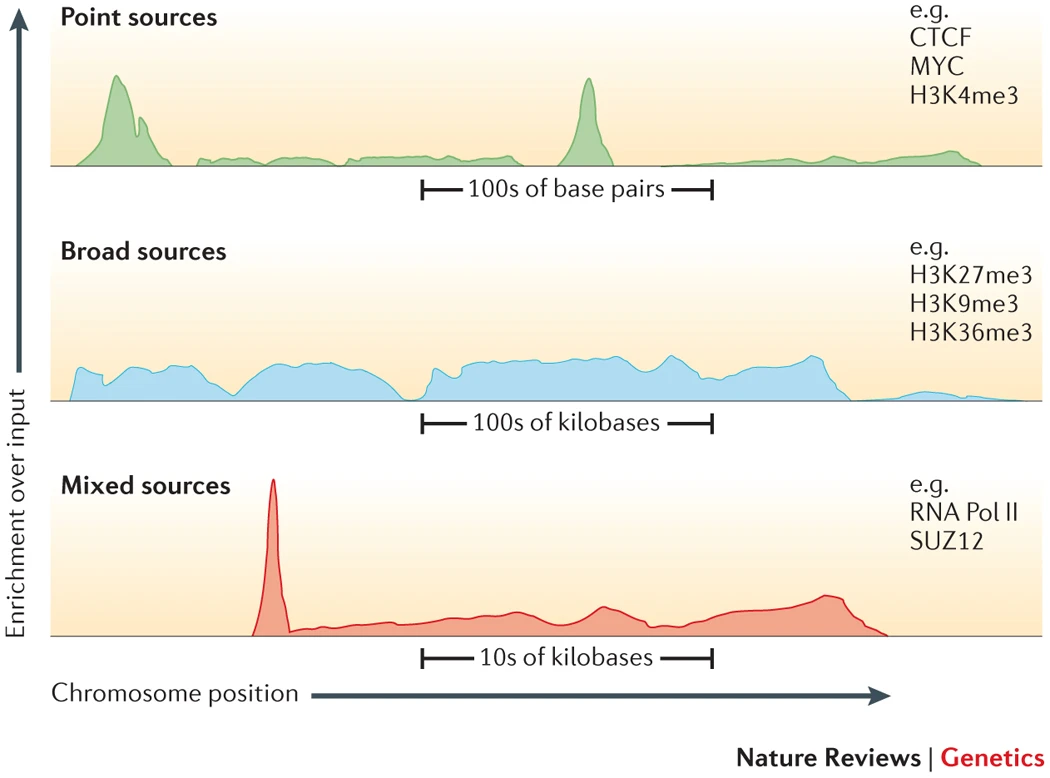
</div>

### <p style="text-align: center;">Figure 1: The breadth of coverage.</p>
###### Sims, D., Sudbery, I., Ilott, N. et al. Sequencing depth and coverage: key considerations in genomic analyses. Nat Rev Genet 15, 121–132 (2014). https://doi.org/10.1038/nrg3642

### Coverage Profile
The coverage for each nucleotidic position (or a window of nucelotides) obtained after mapping the reads and obtained from the .sam file. 

### Target
For this script we want to visualize the coverage profile of different genomes in diffrent samples and retrieve the breadth of coverage. The coverage breadth could be indicative for example that the reads are aligned only in one part of the entire genome and this can lead to a wrong identification of a species.

### Software to be installed: _SAMtools_, _Bowtie2_ and _Circos_ embedded in python.

### Input files
For the MAGs files generated the sofware uses the _fna_ (fasta nucleic acid) format, this format is slightly different from _FASTA_ as each different sequence in the file are distincted from the other with a title, but both formats uses the FASTA.

Using the next line you can change the format of your file but remember that the content and format of the file remain unchanged during the conversion. 
```{python}
mv input.fasta output.fna
```

## 2. Set Working Directory  <a class="anchor" id="chapter-2-set-working-directory"></a>

In the first part of the analysis, you will be working in the **Linux terminal**. To begin, you need to create directories (folders) where you will store your MAGs (Metagenome-Assembled Genomes) and sequences. To do this, you can use the **mkdir** command to create two new folders: 'MAGs' (which will contain the MAGs of different bacterial species) and 'sequences' (which will contain the forward and reverse sequences for all the samples). Remember that these folders should be empty initially, and you will need to upload your data into them.

In [ ]:
mkdir MAGs
mkdir sequences

## 3. Reads Alignment <a class="anchor" id="chapter-3-reads-alignment"></a>

Now, you will navigate to your MAGs folder using the **cd** command and utilize the **cat** (concatenate) function to create a multifna file. This multifna file will contain all the MAGs' FNA/FASTA files that you have stored in your MAGs folder. 

In [ ]:
cd Project/MAGs/ #use the cd command to get into your MAGs folder

cat *fna > multifna.fna #use the cat comand to concatenate all your MAGs in one file 

With the following code you are going to create an index from the multifna file and save it as **"index"** for example, employing the **bowtie2-build** function.

In [ ]:
bowtie2-build multifna.fna index

In the following chunk you set up a loop to process the pair-end FASTQ files using **Bowtie2** which is a tool for aligning sequencing reads to long reference sequences and convert them into SAM files, which are designed to store the aligned sequencing reads and their mappings to a reference genome. Please note that this step will take approximately 18 minutes to complete if you are working with 4 threads.

In [1]:
#NOTE: replace the "$threads" with the number of threads suitable for your device.
#NOTE: you need to add the path of sequences folder with the fastq files.
for r1 in /"add the path(directory) of the MAGs folder here"/*.fastq; do r2=${r1/_1.fastq/_2.fastq}; n=${r1/*\/}; sample=${n/_1.fastq/}; 
bowtie2 -q -p $threads -x index -1 $r1 -2 $r2 -S $sample.sam;
done

SyntaxError: invalid syntax (Temp/ipykernel_10520/2615846966.py, line 4)

The following code set up a loop to iterate over all the extension **.sam** in the directory. Employing **SAMtools**, the script processes each SAM file in the specified directory, converts it to BAM format, sorts the BAM file, and saves the sorted BAM file with the **.sorted.bam** extension.

-The **view** command print all the alignments in the input alignment file to a standart output in SAM format.

-The **sort** command sort the alignments by leftmost coordinates.

In [ ]:
#NOTE: replace the "$threads" with the number of threads suitable for your device.
#NOTE: you need to add the path of sequences folder which now contains the previously created sam files.
for f in /"add the path(directory) of the MAGs folder here"/*.sam; do samtools view -@ $threads
 -b $f | samtools sort -@ $threads > $f.sorted.bam;done

The following code uses SAMtools again to calculate read depth, with the **depth** command. It operates on the sorted BAM files and saves the resulting data to a text file named 'depth.txt'. By including the -H option, the header line is included in the output.

In [ ]:
samtools depth -H *sorted.bam > depth.txt

## 4. Graph Generation <a class="anchor" id="chapter-4-graph-generation"></a>

In the second part of the analysis, you will be working with the **Python** language, for example, using Jupyter Notebook.

To start, you need to import all the required libraries. If you do not have these libraries installed, you will need to install them using the following command: _!pip install library_name_.

In [16]:
import csv
import os
from operator import itemgetter
import matplotlib.pyplot as plt
import pycircos
import pandas as pd
from Bio import SeqIO
import copy
import numpy as np
from ipyfilechooser import FileChooser

In the follwing chunks you will have to select your directories with the path to the MAGs folder and detpth.txt which are your inputs and to your mag_cvs (intermediate files) and circle_graph folders which are your outputs.

In [17]:
fasta_directory = r"add the path(directory) of the MAGs folder here"

Select folder containing MAGs in fasta format


FileChooser(path='C:\Users\Utente\Downloads', filename='', title='', show_hidden=False, select_desc='Select', …

In [3]:
depth_directory = r"add the path(directory) of the depth.txt file here"

Select depth.txt file


FileChooser(path='C:\Users\Utente\Downloads', filename='', title='', show_hidden=False, select_desc='Select', …

In [5]:
csv_directory = r"add the path(directory) of the mag_csv (intermediate files) folder here"

Select folder in which you want to save csv files containg the contigs of a MAG with start and end positions


FileChooser(path='C:\Users\Utente\Downloads', filename='', title='', show_hidden=False, select_desc='Select', …

In [6]:
circle_graph_directory = r"(add the path(directory) of circle_graph folder (output) here)"

Select folder in which you want to save graph images


FileChooser(path='C:\Users\Utente\Downloads', filename='', title='', show_hidden=False, select_desc='Select', …

As in the first part of the analysis, you obtained a depth.txt file that contains all your MAGs together, without the ability to distinguish which contig corresponds to each MAG. In this step, you will create a CSV file for each MAG individually, that contains the name of each contig in that MAG and the positions in which each contig starts (1) and ends (length of the contig).

In the following section, you will create a fasta_file list consisting of the names of all the elements in the fasta_directory that end with .fna.

In [ ]:
# Generate csv files and depth files for each MAG file
fasta_files = [file for file in os.listdir(fasta_directory) if file.endswith('.fna')]

In [ ]:
depth=pd.read_csv(depth_directory,sep="\t")

In the following code, a for loop is created to iterate over the filenames in the **fasta_file** list. Within the loop, paths are constructed for the MAGs file and the CSV file.

The **fasta_path** file is then opened, and the opened file is read using **SeqIO.parse()** from the Biopython library to read the sequences and extract their names and lengths. The names are stored in the **contig_names set**. The name, start position (always 1), and end position (sequence length) are written to the CSV file using the csv.writer object. 

The CSV file is then read to extract the contig names and their lengths into a list of tuplets called **lines**. The itemgetter function from the operator module is used to specify the sorting key (length) for sorting the lines list in descending order.

The code selects the top 10 lines (contigs with the highest lengths) and stores them in the **top_10_lines** list.

The names of the contigs in the top 10 lines are stored in the **list_of_contigs** list.

An empty **subset** DataFrame is created. For each contig in **list_of_contigs**, rows from **depth** DataFrame are selected based on matching contig names, and those rows are concatenated with the **subset** DataFrame.

The names of the columns in **subset** (excluding the first two columns that are contigs and positions) are extracted as **samples**.

The maximum value in the columns of subset (excluding the first two columns) is determined and stored in **max_value**.

The code creates a circular graph using the **pycircos** library (**Gcircle object**) with a specified figure size.
For each line in **top_10_lines**, an **arc** object is created using Garc with the contig name and length. These arcs are added to the circular graph.
The circular graph is configured to have a full circle (0 to 360 degrees) using **set_garcs**. Tickmarks are added to each arc using **tickplot**.

For each contig in **list_of_contigs**, rows from **subset** are selected based on matching contig names. A loop iterates over each sample, and data from the selected rows and the current sample are used to fill a region in the circular graph using **fillplot**. The position of the filled region is incremented (**x += 160**) to avoid overlapping plots.

Finally, the output file path is created and the circular graph is saved as a PDF file using the **save** method of the circle object.

In [10]:
for fasta_file in fasta_files:
    # MAG file paths
    fasta_path = os.path.join(fasta_directory, fasta_file)
    csv_file = os.path.join(csv_directory, os.path.splitext(fasta_file)[0] + ".csv")
    
    # Creating csv file for the MAG containing (contig, start, end)
    fasta_sequences = SeqIO.parse(open(fasta_path), 'fasta')
    with open(csv_file, "w", newline='') as csv_file_obj:
        writer = csv.writer(csv_file_obj)
        writer.writerow(['Name', 'Start', 'End'])

        for fasta in fasta_sequences:
            name, sequence = fasta.id, str(fasta.seq)
            sequence_length = len(sequence)
            writer.writerow([name, '1', sequence_length])

    # Read the CSV file to get the contig lengths
    with open(csv_file) as f:
        header = next(f)
        lines = []
        for line in f:
            line = line.rstrip().split(",")
            name = line[0]
            length = int(line[-1])
            lines.append((name, length))

    # Sort the lines by length in descending order
    lines.sort(key=itemgetter(1), reverse=True)

    # Consider only the top 10 lines with the highest length
    top_10_lines = lines[:10]
    
    list_of_contigs = [row[0] for row in top_10_lines]      
    
    subset = pd.DataFrame()
    for contig in list_of_contigs:
        dftmp = depth[depth[depth.columns[0]]== contig]
        subset = pd.concat([dftmp,subset])
        
    samples = list(subset.columns[2:])    

    max_value = subset.iloc[:,2:].max().max()
    
    # Generate circle graph for the MAG file
    circle = pycircos.Gcircle(figsize=(14, 14))
    for line in top_10_lines:
        name, length = line
        arc = pycircos.Garc(arc_id=name, size=length, interspace=2, raxis_range=(200, 400), label_visible=False)
        circle.add_garc(arc)

    circle.set_garcs(0, 360)
    for arc_id in circle.garc_dict:
        circle.tickplot(arc_id, raxis_range=(200, 400), tickinterval=20000000, ticklabels=None)
        
    for cont in list_of_contigs:
        dftmp = subset[subset["#CHROM"] == cont]
        x = 420
        colors = ["g","r","b"]
        color_idx=0
        for sample in samples:
            skewtmp = dftmp[sample].values
            circle.fillplot(cont, skewtmp, rlim=(0, max_value), base_value=0, raxis_range=(x, x + 150),
                            facecolor=colors[color_idx], edgecolor=colors[color_idx], linewidth=1)
            x += 160
            color_idx+=1
            if color_idx>len(colors)-1:
                color_idx=0
                
    # Saving the circos plots ad PDFs
    output_file = os.path.join(circle_graph_directory, os.path.splitext(fasta_file)[0] + ".pdf")
    circle.save(output_file, "pdf", None)


## 5. Coverage Percentage <a class="anchor" id="chapter-5-coverage-percentage"></a>

the this section of the script creates a breadth coverage table for each MAG per each sample, providing the coverage for each contig per each MAG

In [9]:
# output directory 
coverage_table_directory = r"add the path(directory) of the folder weher you want to add the table"

Select folder in which you want to save breadth coverage table


FileChooser(path='C:\Users\Utente\Downloads', filename='', title='', show_hidden=False, select_desc='Select', …

In [ ]:
for fasta_file in fasta_files:
    # MAG file paths
    fasta_path = os.path.join(fasta_directory, fasta_file)
    csv_file = os.path.join(csv_directory, os.path.splitext(fasta_file)[0] + ".csv")
    
    # Creating csv file for the MAG containing (contig, start, end)
    fasta_sequences = SeqIO.parse(open(fasta_path), 'fasta')
    with open(csv_file, "w", newline='') as csv_file_obj:
        writer = csv.writer(csv_file_obj)
        writer.writerow(['Name', 'Start', 'End'])

In [ ]:
fasta_dict = {}

for fasta_file in fasta_files:
       
    contig_names = []
    for fasta in fasta_sequences:
        contig_names.append(fasta.id)
    
    fasta_dict[fasta_file] = contig_names

In [ ]:
coverage_data = {}

with open(depth_directory, "r") as file:
    reader = csv.reader(file, delimiter="\t")
    next(reader)  
    for row in reader:
        contig = row[0]
        position = int(row[1])
        samples_coverages = [int(x) for x in row[2:]]
                
        if contig not in coverage_data:
            coverage_data[contig] = {}
        
        coverage_data[contig][position] = samples_coverages

In [ ]:
# Writing the data in the output file
with open(coverage_table_directory + "\coverage_table.csv", "w", newline='') as file:
    writer = csv.writer(file)
    
    # Writing the header of the table
    header = ["MAG", "Contig"]
    header.extend(["Breadth coverage Sample " + str(i+1) for i in range(len(samples_coverages))])
    writer.writerow(header)
    
    # Writing the data for each contig
    for mag, contigs in fasta_dict.items():
        for contig in contigs:
            row = [mag, contig]
            breadth_coverages = []
            
            if contig in coverage_data:
                positions = coverage_data[contig].keys()
                total_positions = len(positions)
                
                for i in range(len(samples_coverages)):
                    covered_positions = sum([1 for pos in positions if coverage_data[contig][pos][i] > 0])
                    breadth_coverage = covered_positions / total_positions
                    breadth_coverages.append(breadth_coverage)
            else:
                breadth_coverages = [0] * len(samples_coverages)
            
            row.extend(breadth_coverages)
            writer.writerow(row)

In [ ]:
df = pd.read_csv(coverage_table_directory + "\coverage_table.csv")
df

In [ ]:
# Calculate the Average coverage per each MAG per each sample

#Group rows by the MAGs and calculate the average coverage of the samples
grouped_df = df.groupby(df.columns[0]).mean()

# List to store information about averages less than 0.1
less_than_0_1 = []

# Print the grouped data
for index, row in grouped_df.iterrows():
    print(f"MAG: {index}")
    for i, column in enumerate(df.columns[2:], start=2):
        print(f"Average of {column}: {row[column]}")
        if row[column] < 0.1:
            less_than_0_1.append((index, column, row[column]))

    print()

In [ ]:
# Print the MAGs samples with averages less than 0.1
print("MAGs with Average < 10% :")
for value in less_than_0_1:
    index, column, avg = value
    print(f"MAG: {index}, {column}: {avg}")

In [ ]:
# Calculate the percentage of the contigs that have coverage < 10% per each MAG per each sample

#Group rows by the MAGs
grouped = df.groupby(df.columns[0])

# Initialize a list to store the information for percentages > 50
greater_than_50_list = []

# Iterate over the groups 
for group_name, group_data in grouped:
    print("MAG:", group_name)

    # Calculate the percentage of contigs that have coverage < 0.1 for each samples
    for idx, column in enumerate(group_data.columns[2:], start=2):
        # Convert column to numeric data type, ignoring non-numeric values
        group_data[column] = pd.to_numeric(group_data[column], errors='coerce')
        percentage = (group_data[column] < 0.1).mean() * 100
        print("Sample {} ".format(idx-1, idx, column), ("Percentage of contigs that covered by < 10%:", percentage))
        
        # Check if the percentage is greater than 50 and add the information to the list
        if percentage > 50:
            greater_than_50_list.append((group_name, idx-1, percentage))